In [96]:
# Import libraries
from itertools import zip_longest, chain
from matplotlib import pyplot as plt
import numpy as np

In [97]:
# Given Parameters
r = 0.02;        # Risk-free Rate
S0 = 100;        # Current underlying stock price
sigma = 0.25;    # Volatility
K = 105;         # Strike price
T = 2/12;        # Maturity
M = 1/52;        # Lattice Unit Time
m = round(T/M);  # Number of weeks in two months


In [98]:
def lattice_plotting(m, price_lattice):
    """
    Function to plot lattices. 
    Inputs: 
    m = number of time increments
    price_lattice = upper diagonal array of prices resembling lattice structure
    """
    fig = plt.figure(figsize=[5, 5])
    for i in range(m):
        x = [1, 0, 1]
        for j in range(i):
            x.append(0)
            x.append(1)
        x = np.array(x) + i
        y_previous = price_lattice[:i+1,i]
        y_current = price_lattice[:i+2,i+1]
        y = [cell for cell in chain.from_iterable(zip_longest(y_current, y_previous)) if cell is not None]
        plt.plot(x, y, 'bo-')


In [99]:
def Ame_put_lattice(r, S0, sigma, K, T, m):
    """
    Pricing American put options using the lattice method and backwards induction.
    Plots both stock price and put price lattices.
    Returns stock price and put price lattices in the form of arrays, and returns the put price at time 0.
    """
    # Calculate Lattice Parameters
    dt = T/m
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt)-d)/(u-d)
    
    # Initialize price and put lattices
    stock_prices = np.zeros([m+1, m+1])
    put_prices = np.zeros([m+1, m+1])
    
    # Populate the stock price lattice using u and d multiples
    for i in range(m+1):
        for j in range(i+1):
            stock_prices[j, i] = S0*(d**j)*(u**(i-j))
    
    # Put payoffs at maturity
    put_prices[:, m] = [max(0, K-stock_prices[idx, m]) for idx, row in enumerate(stock_prices)]
    
    # Populate the put price lattice using backwards induction
    for i in range(m-1, -1, -1):
        for j in range(i+1):
            exercise_later = np.exp(-r*dt)*(p*put_prices[j, i+1] + (1-p)*put_prices[j+1, i+1])
            exercise_now = max(0, K-stock_prices[j, i])
            put_prices[j, i] = max(exercise_now, exercise_later)
    
    # Plotting Stock Price Lattice
    lattice_plotting(m, stock_prices)
    plt.title('Stock Price Lattice', fontsize = 16)
    plt.xlabel('Time Intervals (Weeks)', fontsize = 12)
    plt.ylabel('Stock Price ($)', fontsize = 12)
    plt.show()
    
    # Plotting Put Price Lattice
    lattice_plotting(m, put_prices)
    plt.title('Put Price Lattice', fontsize = 16)
    plt.xlabel('Time Intervals (Weeks)', fontsize = 12)
    plt.ylabel('Put Price ($)', fontsize = 12)
    plt.show()
    
    return [np.round(stock_prices, 2), np.round(put_prices, 2), round(put_prices[0,0], 2)]

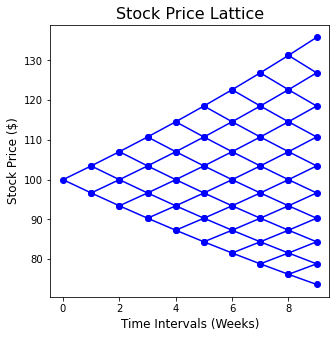

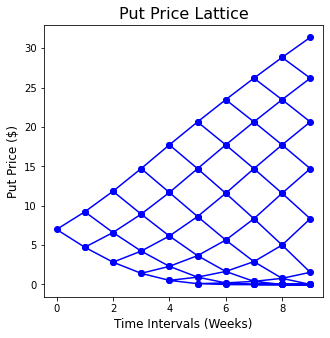

In [100]:
[stock_lattice, put_lattice, put_price] = Ame_put_lattice(r, S0, sigma, K, T, m)

In [101]:
print('Price of an American Put Option using Binomial Lattice Method: $', np.round(put_price, 2)) 

Price of an American Put Option using Binomial Lattice Method: $ 6.99
